In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

url = "https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv"

df = pd.read_csv(url)

In [2]:
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [3]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.865753
std,18.085892,0.273890,13.786445,0.0,30.948132
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [4]:
def get_lower_and_upper_bounds(x, multiplier):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lower_fence = q1 - multiplier*iqr
    upper_fence = q3 + multiplier*iqr
    lower_outliers = x[x <= lower_fence]
    upper_outliers = x[x >= upper_fence]
    return lower_outliers, upper_outliers

In [5]:
get_lower_and_upper_bounds(df.Temperature, 1.5)

(364    15.1
 Name: Temperature, dtype: float64,
 41    212.0
 Name: Temperature, dtype: float64)

### Takeaways
- The upper outlier should be taken into consideration because a temperature of 212 degrees outside would've killed people. Not realistic so it must have been a typo.

- The lower outlier is still within a reasonable range, unless the time of year would not have agreed with this logic.

In [6]:
get_lower_and_upper_bounds(df.Rainfall, 1.5)

(Series([], Name: Rainfall, dtype: float64),
 0      2.00
 1      1.33
 2      1.33
 5      1.54
 6      1.54
 10     1.54
 11     1.33
 12     1.33
 15     1.67
 16     1.43
 19     1.43
 23     1.54
 27     1.33
 28     1.33
 337    1.54
 338    1.82
 342    1.43
 343    1.82
 345    1.33
 346    1.43
 347    1.54
 350    1.33
 351    1.43
 354    1.33
 355    1.54
 359    1.43
 363    1.43
 364    2.50
 Name: Rainfall, dtype: float64)

### Takeaways
- These don't necessarily feel like outliers due to how close together they are in measurement.

- Possibly higher than usual but this could've been due to out of the norm weather (hurricane, flooding, etc.)

In [7]:
get_lower_and_upper_bounds(df.Flyers, 1.5)

(324   -38
 Name: Flyers, dtype: int64,
 166    77
 171    76
 194    80
 198    76
 Name: Flyers, dtype: int64)

### Takeaways
- The lower outlier should be removed because it would make it appear that they were giving away flyers they did not have.

- The upper outliers would be okay to keep as they may have been days where they had an extra person helping with handing out fliers.

In [8]:
get_lower_and_upper_bounds(df.Price, 1.5)

(0      0.5
 1      0.5
 2      0.5
 3      0.5
 4      0.5
       ... 
 360    0.5
 361    0.5
 362    0.5
 363    0.5
 364    0.5
 Name: Price, Length: 365, dtype: float64,
 0      0.5
 1      0.5
 2      0.5
 3      0.5
 4      0.5
       ... 
 360    0.5
 361    0.5
 362    0.5
 363    0.5
 364    0.5
 Name: Price, Length: 365, dtype: float64)

### Takeaways
- The price column is just consistently the same number so this will be inaccurate data.

In [9]:
get_lower_and_upper_bounds(df.Sales, 1.5)

(Series([], Name: Sales, dtype: int64),
 181    143
 182    158
 183    235
 184    534
 Name: Sales, dtype: int64)

In [34]:
get_lower_and_upper_bounds(df.Temperature, 3)

(Series([], Name: Temperature, dtype: float64),
 41    212.0
 Name: Temperature, dtype: float64)

In [11]:
get_lower_and_upper_bounds(df.Rainfall, 3)

(Series([], Name: Rainfall, dtype: float64),
 0      2.00
 338    1.82
 343    1.82
 364    2.50
 Name: Rainfall, dtype: float64)

In [12]:
get_lower_and_upper_bounds(df.Flyers, 3)

(324   -38
 Name: Flyers, dtype: int64,
 Series([], Name: Flyers, dtype: int64))

In [13]:
get_lower_and_upper_bounds(df.Price, 3)

(0      0.5
 1      0.5
 2      0.5
 3      0.5
 4      0.5
       ... 
 360    0.5
 361    0.5
 362    0.5
 363    0.5
 364    0.5
 Name: Price, Length: 365, dtype: float64,
 0      0.5
 1      0.5
 2      0.5
 3      0.5
 4      0.5
       ... 
 360    0.5
 361    0.5
 362    0.5
 363    0.5
 364    0.5
 Name: Price, Length: 365, dtype: float64)

In [14]:
get_lower_and_upper_bounds(df.Sales, 3)

(Series([], Name: Sales, dtype: int64),
 181    143
 182    158
 183    235
 184    534
 Name: Sales, dtype: int64)

In [15]:
def emp_rule(x, sigma):
    zscores = (x - x.mean()) / x.std()
    df = pd.DataFrame()
    df["x"] = x
    df["zscore"] = abs(zscores)
    outliers = df[zscores >= sigma]
    return outliers


In [16]:
df.columns

Index(['Date', 'Day', 'Temperature', 'Rainfall', 'Flyers', 'Price', 'Sales'], dtype='object')

In [17]:
emp_rule(df.Temperature, 2)

,x,zscore
41,212.0,8.336627
166,99.3,2.105251
176,102.6,2.287714
181,102.9,2.304301
190,98.0,2.033372
198,99.3,2.105251
202,99.6,2.121838
207,97.9,2.027843


In [18]:
emp_rule(df.Rainfall, 2)

,x,zscore
0,2.00,4.286488
5,1.54,2.606983
6,1.54,2.606983
10,1.54,2.606983
15,1.67,3.081626
16,1.43,2.205363
19,1.43,2.205363
23,1.54,2.606983
337,1.54,2.606983
338,1.82,3.629291


In [19]:
emp_rule(df.Flyers, 2)

,x,zscore
166,77,2.676244
170,70,2.168499
171,76,2.603709
182,68,2.023429
183,68,2.023429
194,80,2.893849
198,76,2.603709
203,72,2.313569
204,69,2.095964
207,74,2.458639


In [20]:
emp_rule(df.Price, 2)

,x,zscore


In [21]:
emp_rule(df.Sales, 2)

,x,zscore
181,143,3.720233
182,158,4.204914
183,235,6.692948
184,534,16.354275


In [22]:
emp_rule(df.Temperature, 3)

,x,zscore
41,212.0,8.336627


In [23]:
emp_rule(df.Rainfall, 3)

,x,zscore
0,2.00,4.286488
15,1.67,3.081626
338,1.82,3.629291
343,1.82,3.629291
364,2.50,6.112037


In [24]:
emp_rule(df.Flyers, 3)

,x,zscore


In [25]:
emp_rule(df.Price, 3)

,x,zscore


In [27]:
emp_rule(df.Sales, 3)

,x,zscore
181,143,3.720233
182,158,4.204914
183,235,6.692948
184,534,16.354275


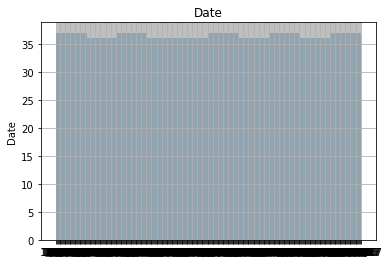

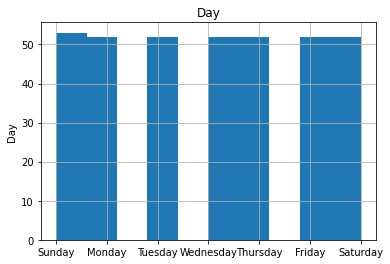

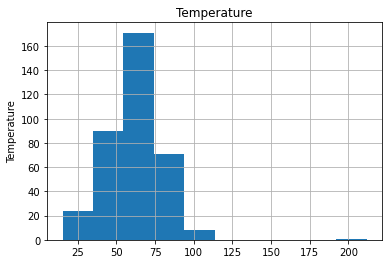

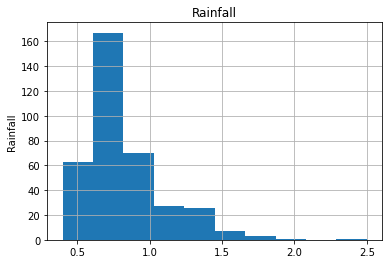

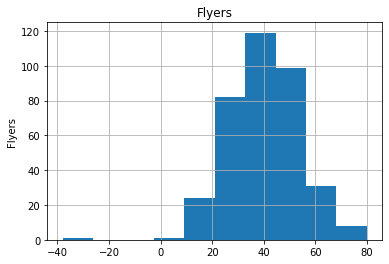

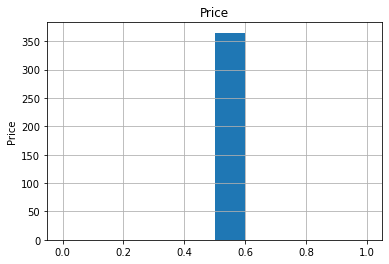

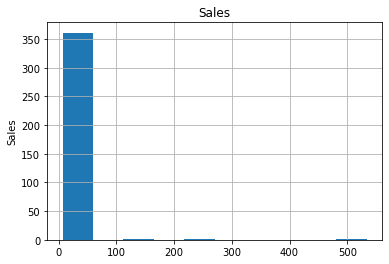

In [33]:
for col in df.columns:
    df[col].hist()
    plt.ylabel(col)
    plt.title(col)
    plt.show()